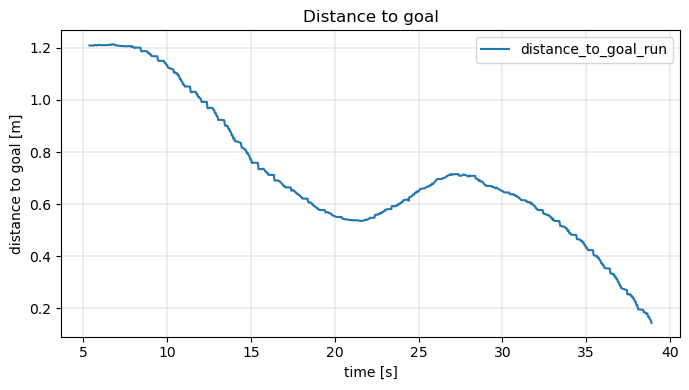

In [4]:
import os, glob, csv
import matplotlib.pyplot as plt

def load_csv(path):
    t, d = [], []
    with open(path, "r", newline="") as f:
        r = csv.reader(f)
        next(r, None)  
        for row in r:
            if len(row) < 2:
                continue
            try:
                t.append(float(row[0]))
                d.append(float(row[1]))
            except ValueError:
                continue
    return t, d

ros_dir = os.path.join(os.path.expanduser("~"), ".ros")
files = sorted(glob.glob(os.path.join(ros_dir, "distance_to_goal*.csv")))

fig, ax = plt.subplots(figsize=(7, 4))
for path in files:
    t, d = load_csv(path)
    if not t:
        continue
    label = os.path.splitext(os.path.basename(path))[0]
    ax.plot(t, d, linewidth=1.5, label=label)

ax.set_xlabel("time [s]")
ax.set_ylabel("distance to goal [m]")
ax.set_title("Distance to goal")
ax.legend()
ax.grid(True, linewidth=0.3)
fig.tight_layout()
fig.savefig("dist_to_goal.pdf")
plt.show()
